# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
print(data.shape)
print(data.describe())
data.sample(10)

(5391, 6)
          Rank
count 5,391.00
mean  2,696.00
std   1,556.39
min       1.00
25%   1,348.50
50%   2,696.00
75%   4,043.50
max   5,391.00


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3864,606,3/25/2011,Sucker Punch,"$75,000,000","$89,758,389","$36,392,502"
1721,1832,12/1/2001,Antitrust,"$30,000,000","$17,865,209","$10,965,209"
217,5297,1/1/1977,Eraserhead,"$100,000","$7,012,524","$7,000,000"
79,4337,12/18/1957,The Bridge on the River Kwai,"$3,000,000","$33,300,000","$33,300,000"
4980,4572,8/28/2015,We Are Your Friends,"$2,000,000","$10,166,209","$3,591,417"
4049,3531,12/8/2011,Glee: The 3D Concert Movie,"$9,000,000","$17,462,398","$11,862,398"
458,4559,12/31/1986,Witchboard,"$2,000,000","$7,369,373","$7,369,373"
101,4550,12/25/1962,To Kill A Mockingbird,"$2,000,000","$13,129,846","$13,129,846"
691,1636,9/17/1993,The Age of Innocence,"$34,000,000","$32,014,993","$32,014,993"
3465,2506,9/18/2009,The Burning Plain,"$20,000,000","$1,167,092","$200,730"


In [ ]:
print(data.isna().values.any())
print(data.duplicated().values.any())
# Not good enough, some movies have remakes
print(data.duplicated(subset='Movie_Title').values.any())
# Have to check that it's really the same
dupes = data[data.duplicated(subset=['Release_Date','Movie_Title']) == True]
dupes.index
data.drop(dupes.index, inplace=True)
# Now, just one:
data[data.Movie_Title == 'A Dog\'s Breakfast']

False
False
True


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3054,5289,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5390 non-null   int64 
 1   Release_Date           5390 non-null   object
 2   Movie_Title            5390 non-null   object
 3   USD_Production_Budget  5390 non-null   object
 4   USD_Worldwide_Gross    5390 non-null   object
 5   USD_Domestic_Gross     5390 non-null   object
dtypes: int64(1), object(5)
memory usage: 294.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
# My Way
# data.USD_Production_Budget = data.USD_Production_Budget.str.replace(",","")
# data.USD_Production_Budget = data.USD_Production_Budget.str.replace("$","")
# data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget)
# data.info()

# Her Way
chars_to_remove = [",", '$']
cols_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in cols_to_clean:
  for char in chars_to_remove:
    data[col] = data[col].str.replace(char, "")
  data[col] = pd.to_numeric(data[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5390 non-null   int64 
 1   Release_Date           5390 non-null   object
 2   Movie_Title            5390 non-null   object
 3   USD_Production_Budget  5390 non-null   int64 
 4   USD_Worldwide_Gross    5390 non-null   int64 
 5   USD_Domestic_Gross     5390 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 294.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [ ]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5390 non-null   int64         
 1   Release_Date           5390 non-null   datetime64[ns]
 2   Movie_Title            5390 non-null   object        
 3   USD_Production_Budget  5390 non-null   int64         
 4   USD_Worldwide_Gross    5390 non-null   int64         
 5   USD_Domestic_Gross     5390 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 294.8+ KB


In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [ ]:
data[data.Movie_Title == 'John Carter']

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4223,7,2012-09-03,John Carter,275000000,282778100,73058679


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
print(data.USD_Production_Budget.mean())
data.describe()

31119487.807977736


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,390.00","5,390.00","5,390.00","5,390.00"
mean,"2,695.52","31,119,487.81","88,871,907.20","41,243,169.82"
std,"1,556.14","40,525,356.93","168,469,037.10","66,033,082.74"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.25","5,000,000.00","3,877,146.00","1,335,065.75"
50%,"2,695.50","17,000,000.00","27,460,037.00","17,196,565.00"
75%,"4,042.75","40,000,000.00","96,461,821.00","52,348,661.50"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [ ]:
data[data.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [ ]:
data[data.USD_Production_Budget == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
zero_domestic

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
zero_worldwide

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


### Filtering on Multiple Conditions

In [ ]:
# Need to use the special and sign & and put the individual search criteria in parenthesis
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [ ]:
# All of it needs to be a single string query, using the actual word 'and'
international_releases_query = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_releases_query

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
not_released = data[data.Release_Date >= scrape_date]
not_released

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [ ]:
# Note: need to use .index when droping a group of rows. 
# Just the name not_released includes the column names and creates an error
data_clean = data.drop(not_released.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [ ]:
# Worldwide is always either equal to or greater than Domestic, so we use that to measure against budget
# Calculate percentage by number of rows (using len() or shape[0])
money_losing_films = data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
print(money_losing_films)
money_losing_films.shape[0]/data_clean.shape[0]

      Rank Release_Date                       Movie_Title  \
1     5140   1916-05-09                       Intolerance   
6     4630   1927-12-08                             Wings   
8     4240   1930-01-01                     Hell's Angels   
15    4738   1936-05-02                      Modern Times   
17    4814   1936-10-20  Charge of the Light Brigade, The   
...    ...          ...                               ...   
5371  4901   2017-07-28            An Inconvenient Sequel   
5373  2161   2017-08-25                       Tulip Fever   
5374  4237   2017-08-25              Polina danser sa vie   
5381    94   2017-12-05  King Arthur: Legend of the Sword   
5383  2521   2017-12-31                The Thousand Miles   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
1                    385907                    0                   0  
6                   2000000                    0                   0  
8                   4000000                    0      

0.3726546535389188

# Seaborn for Data Viz: Bubble Charts

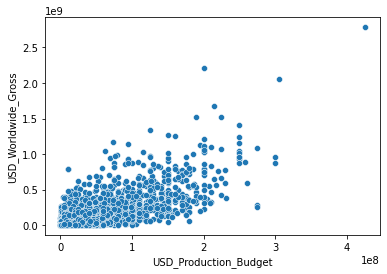

In [ ]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

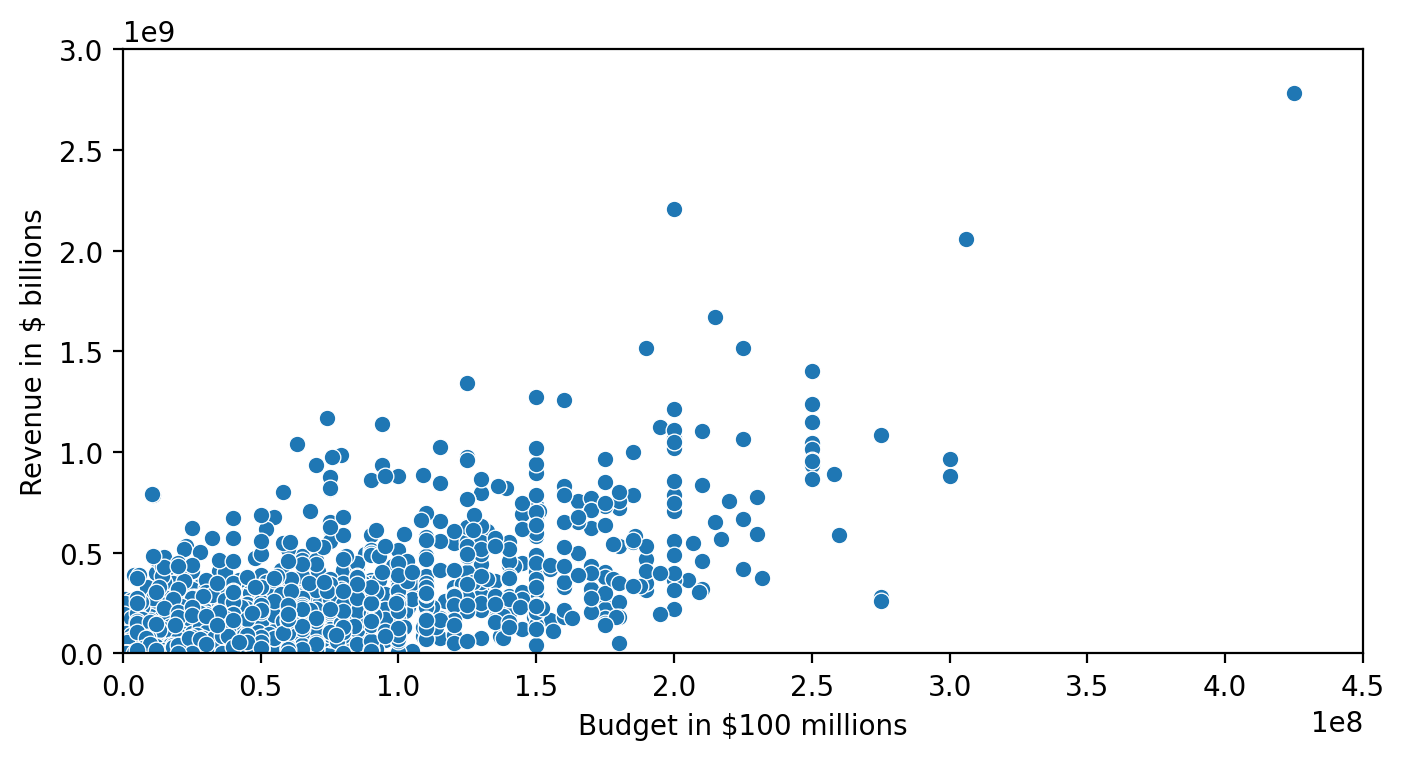

In [ ]:
# Seaborn is built ontop of Matplotlib, so we can use it's configuration and notation
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

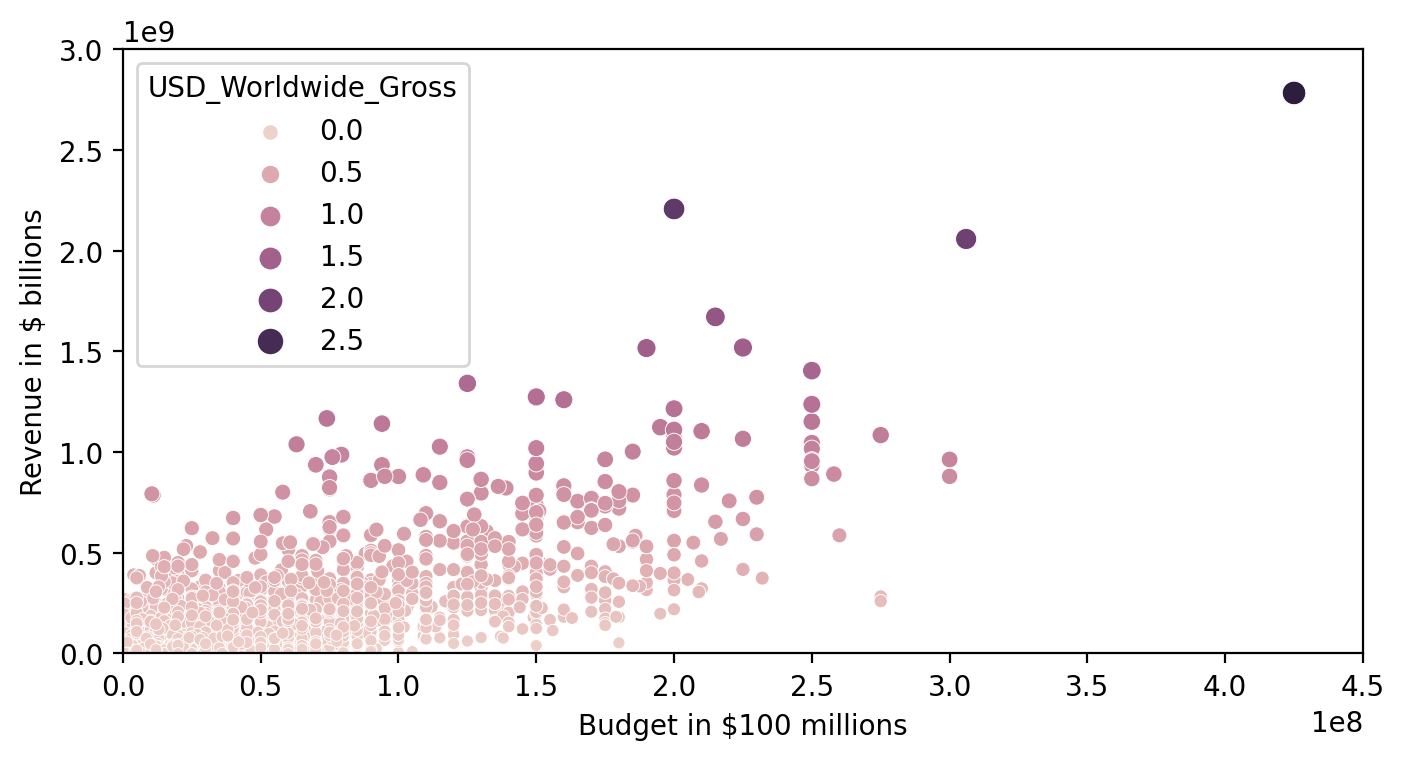

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

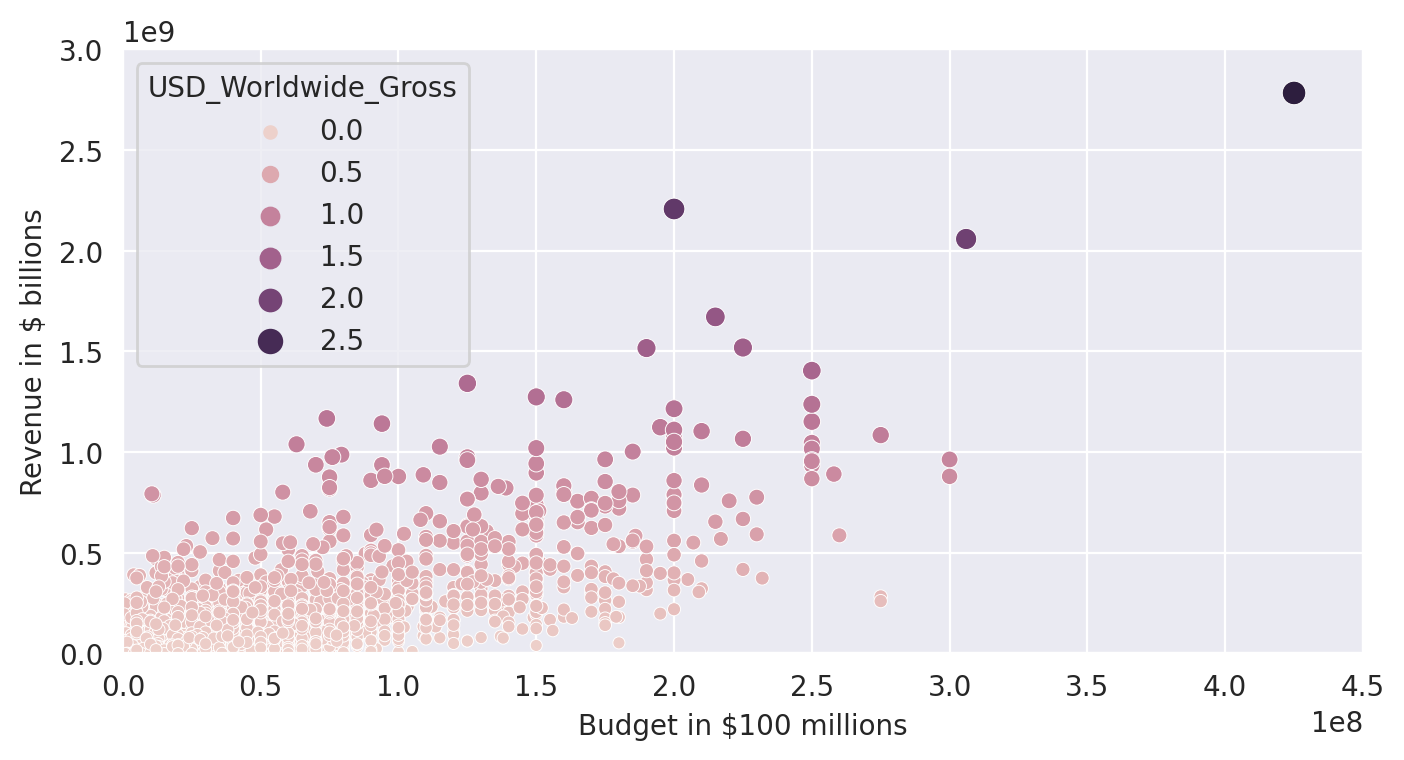

In [ ]:
# Use 'with' to only style this one graph and not all in the Notebook
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart -- NOTE: 'DARKGRID'
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



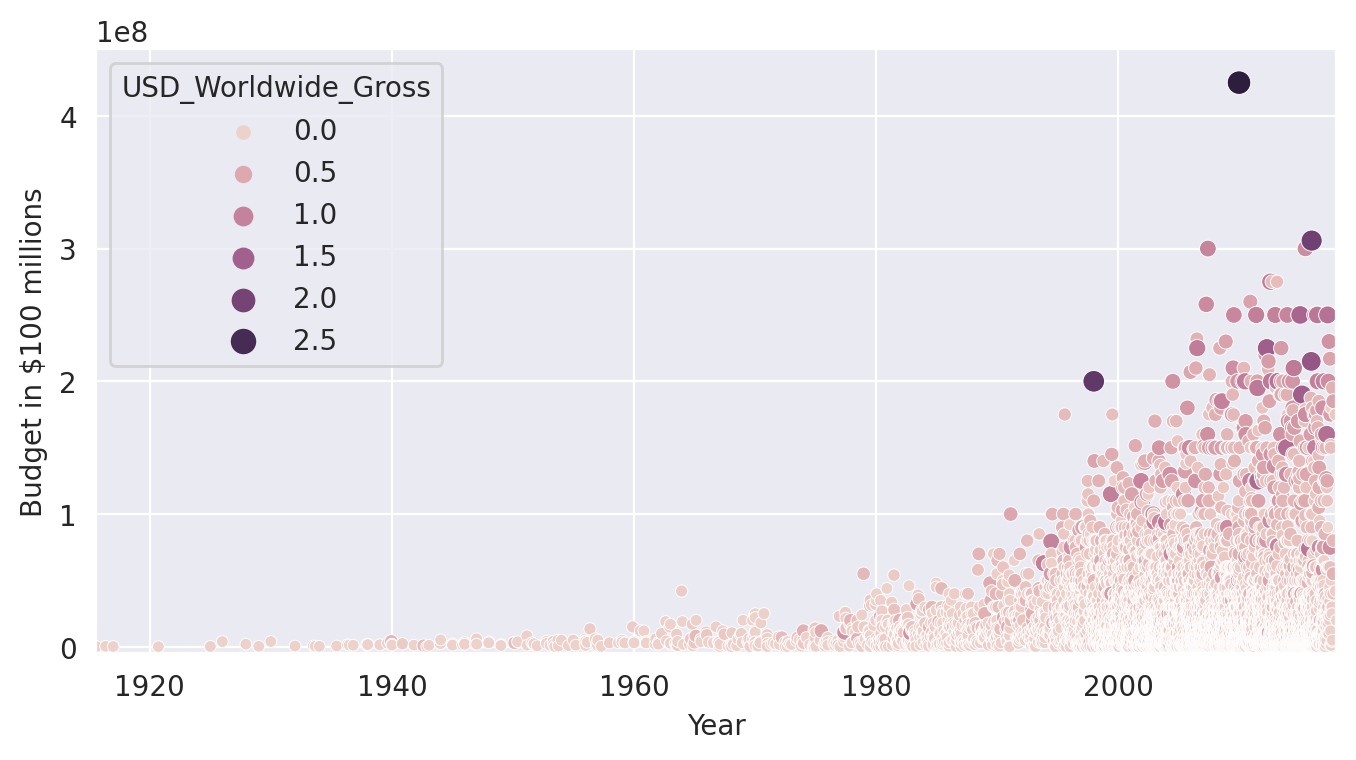

In [ ]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date', 
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
  ax.set(ylim=(-5000000, 450000000),
      xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
      xlabel='Year',
      ylabel='Budget in $100 millions')  

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
date_index = pd.DatetimeIndex(data_clean.Release_Date)
# print(Date_Index)
print(date_index.year)
decade = (date_index.year // 10) * 10
decade

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5383)


Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5383)

In [ ]:
data_clean.insert(loc=6, column='Decade', value=decade)
data_clean

# or, just add it like with dictionaries
# data_clean['Decade'] = decade

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
old_films = data_clean[data_clean.Decade < 1970]
new_films = data_clean[data_clean.Decade >= 1970]
old_films.describe()


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [ ]:
old_films.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


# Seaborn Regression Plots

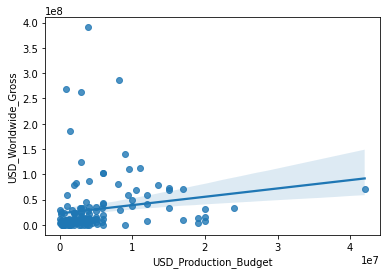

In [ ]:
# Linear Regression scatterplot, with a regression line and confidence interval
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

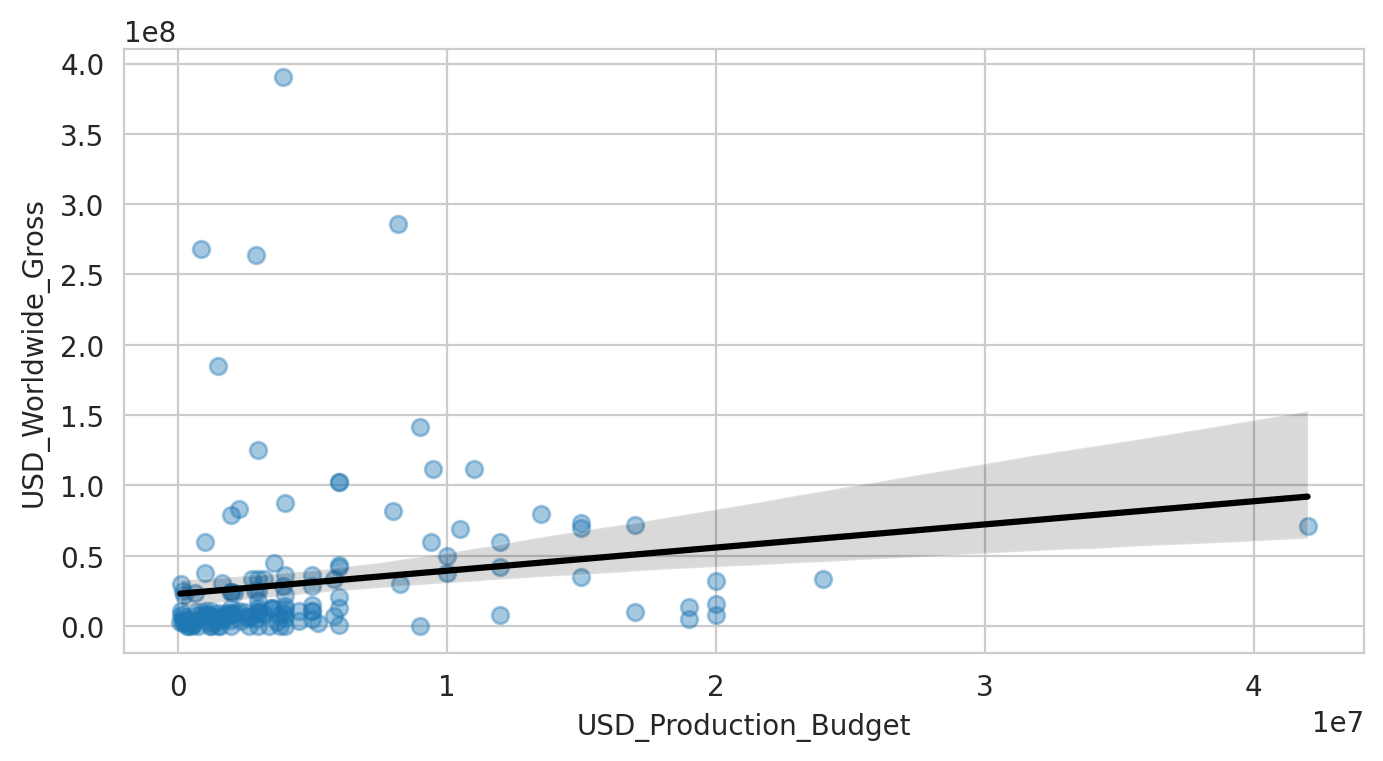

In [ ]:
# Again, use matplotlib notation to configure our seaborn graph
# scatter_kws targets the dots, 'alpha' changes the transparency of the dots
# line_kws targets the line, can change the color of the line

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})
  
            

In [ ]:
# We see that the line doesn't capture the data well
# there isn't a strong relationship/correlation between Budget and Revenue for older films

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

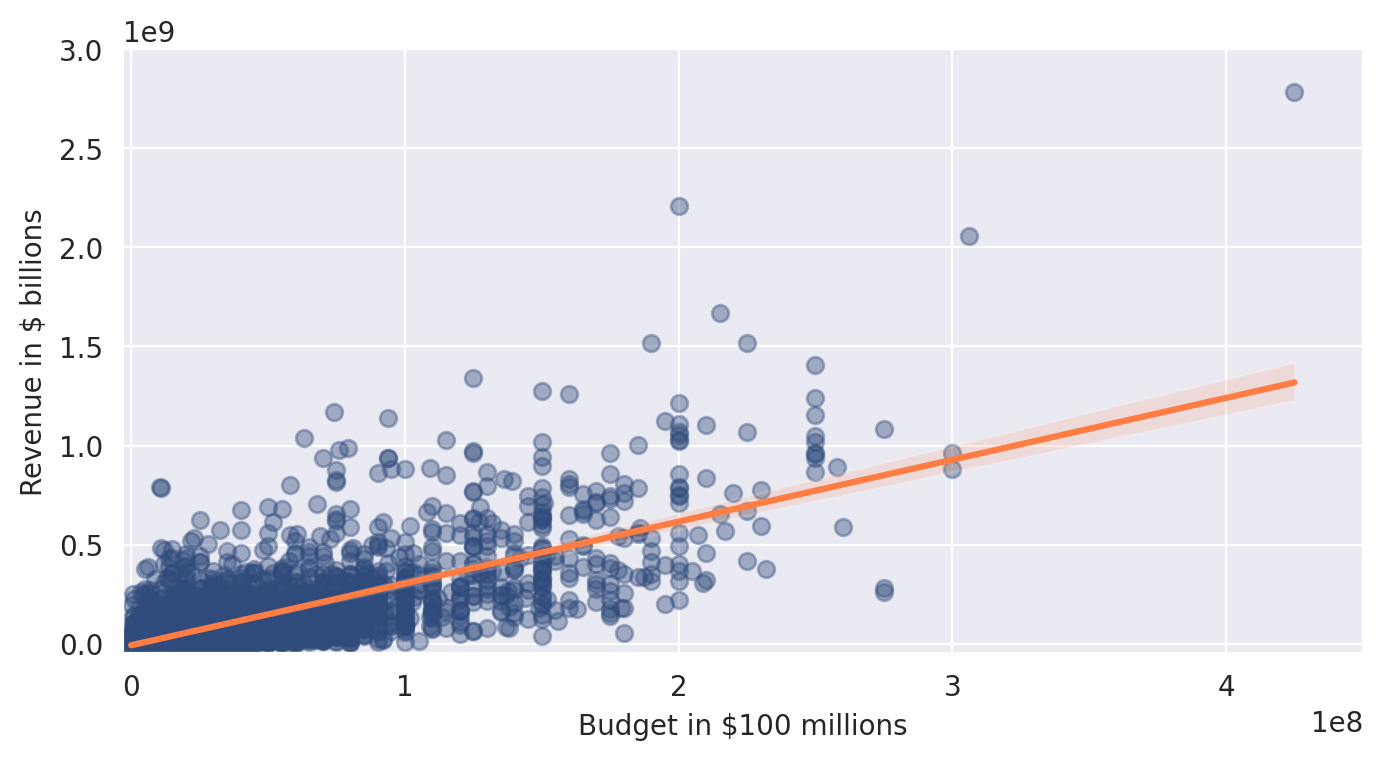

In [ ]:
# Can change color inside scatter_kws, or in the main regplot parameters
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color='#ff7c43',
            scatter_kws={'alpha': 0.4,
                        'color': '#2f4b7c'},
            line_kws={'color': '#ff7c43'})
  ax.set(ylim=(-50000000, 3000000000),
      xlim=(-3000000, 450000000),
      xlabel='Budget in $100 millions',
      ylabel='Revenue in $ billions')  
plt.show()
  

In [ ]:
# Confidence interval is narrower and line fits data better = Stronger correlation for budget to revenue in newer films!

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [ ]:
# create regression object to work with from scikit-learn:
regression = LinearRegression()

In [ ]:
# Now we should specify our features and our targets (i.e., our response variable). 
# You will often see the features named capital X and the target named lower case y
# NOTE: sci-kit does not like Pandas Series, so need to make a new Dataframe with just the column

# Explanatory Variable or Feature
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [ ]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [ ]:
# Get y intercept:
regression.intercept_

# At 0 budget, the line shows -8.6 million

array([-8653311.20858923])

In [ ]:
# Get slope of the line
regression.coef_

# For every dollar spent on the budget, the revenue goes up by 3 dollars

array([[3.12262611]])

In [ ]:
# R-squared
regression.score(X, y)

0.5576797626619335

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [ ]:
# NOTE: Only one regression line can exist at a time, so need to load up the X and y, plus the regression.fit each time
# Regression model for OLD films
# Explanatory Variable or Feature
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f'Intercept: {regression.intercept_} = +$22 million')
print(f'Slope: {regression.coef_} = $1.64 of revenue for $1 of budget')

Intercept: [22821538.63508039] = +$22 million
Slope: [[1.64771314]] = $1.64 of revenue for $1 of budget


In [ ]:
# R-squared
regression.score(X, y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [ ]:
print(f'Full amount: {22821538 + 1.64771314 * 350000000}\n')

# Or, using the regression object, you could also work it out like this:

budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget

# round negative integer means it goes left
revenue_estimate = round(revenue_estimate, -4)

# NOTE: The colon : and dot . in a print statement is quite handy for 
#       controlling the number of digits you'd like to show up in the output)

print(f'The estimated revenue for a $350m film is around ${revenue_estimate:.12}')

Full amount: 599521137.0

The estimated revenue for a $350 film is around $599520000.0
